# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 2. Load Data

In [2]:
df = pd.read_csv("dropout_dataset.csv")

pd.set_option("display.max_columns", None)
df.head(15)

,gender,location_type,program_enrolled,financial_aid_status,part_time_work,career_alignment,family_support,stress_levels,internet_connectivity_issues,parents_education,ragging_experience,age,family_income,distance_to_institute,tenth_marks,attendance_rate,test_scores_avg,practical_skills_rating,backlogs,teaching_quality_rating,motivation_score,num_siblings,dropout
0,Female,Urban,ECE,Partial,Yes,Low,High,Low,No Issues,Both College,No,21,30681.0,4.60,73.4,77.2,67.1,84.3,1,4,5,2,No
1,Male,Rural,Electrical,Partial,Yes,Low,Medium,Medium,Occasional Issues,Both School,No,21,17579.0,50.00,90.7,60.8,47.5,73.5,0,7,5,2,Yes
2,Male,Urban,Computer IT,Partial,Yes,Low,Low,Medium,Frequent Issues,Mixed,Yes,20,4952.0,5.30,69.7,57.2,66.2,78.2,0,8,3,3,Yes
3,Male,Rural,Plumbing,Partial,Yes,Medium,Low,High,No Issues,Both School,No,20,14778.0,27.89,84.3,62.6,44.9,43.6,1,6,4,4,Yes
4,Female,Semi-urban,ECE,Partial,Yes,Low,Medium,Medium,No Issues,Both College,No,22,8725.0,6.10,77.3,83.9,100.0,100.0,2,8,5,3,No
5,Female,Rural,ECE,No,Yes,Medium,High,High,No Issues,No,No,20,3480.0,12.61,74.4,55.0,78.8,100.0,1,7,8,2,No
6,Female,Rural,Computer IT,Partial,Yes,High,Medium,Low,Occasional Issues,Both College,No,19,12614.0,8.60,93.8,69.3,87.2,93.8,0,10,7,2,No
7,Female,Rural,Civil,Partial,No,Medium,Medium,Medium,No Issues,Both School,No,18,31353.0,17.93,87.0,82.4,71.8,73.4,0,7,5,1,No
8,Male,Semi-urban,Computer IT,Full,No,High,High,Low,Occasional Issues,No,No,22,4437.0,7.20,71.0,27.9,67.4,73.5,0,8,6,4,No
9,Male,Semi-urban,Electrical,No,Yes,Medium,High,Medium,Occasional Issues,Mixed,No,18,4922.0,8.20,86.9,77.9,81.3,90.3,1,10,5,2,No


In [3]:
# seleksi kolom relevan
selected_columns = [
    "location_type",
    "family_income",
    "financial_aid_status",
    "distance_to_institute",
    "internet_connectivity_issues",
    "motivation_score",
    "career_alignment",
    "stress_levels",
    "family_support",
    "attendance_rate",
    "test_scores_avg",
    "backlogs",
    "teaching_quality_rating",
    "dropout"
]

df = df[selected_columns]
df.columns

Index(['location_type', 'family_income', 'financial_aid_status',
       'distance_to_institute', 'internet_connectivity_issues',
       'motivation_score', 'career_alignment', 'stress_levels',
       'family_support', 'attendance_rate', 'test_scores_avg', 'backlogs',
       'teaching_quality_rating', 'dropout'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   location_type                 7000 non-null   object 
 1   family_income                 7000 non-null   float64
 2   financial_aid_status          7000 non-null   object 
 3   distance_to_institute         7000 non-null   float64
 4   internet_connectivity_issues  7000 non-null   object 
 5   motivation_score              7000 non-null   int64  
 6   career_alignment              7000 non-null   object 
 7   stress_levels                 7000 non-null   object 
 8   family_support                7000 non-null   object 
 9   attendance_rate               7000 non-null   float64
 10  test_scores_avg               7000 non-null   float64
 11  backlogs                      7000 non-null   int64  
 12  teaching_quality_rating       7000 non-null   int64  
 13  dro

In [5]:
df.isna().sum()

,0
location_type,0
family_income,0
financial_aid_status,0
distance_to_institute,0
internet_connectivity_issues,0
motivation_score,0
career_alignment,0
stress_levels,0
family_support,0
attendance_rate,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,family_income,distance_to_institute,motivation_score,attendance_rate,test_scores_avg,backlogs,teaching_quality_rating
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,13548.316571,9.296380,5.756429,58.339714,61.804386,1.568000,6.710429
std,11070.274111,9.262962,2.259861,23.003713,16.293975,2.103061,1.905618
min,2000.000000,0.500000,1.000000,10.000000,35.000000,0.000000,1.000000
25%,5668.000000,2.510000,4.000000,42.375000,49.275000,0.000000,6.000000
50%,9793.500000,6.300000,6.000000,61.700000,61.000000,1.000000,7.000000
75%,17669.000000,13.085000,7.000000,76.300000,72.900000,2.000000,8.000000
max,50000.000000,50.000000,10.000000,99.700000,100.000000,9.000000,10.000000


In [8]:
for col in df.select_dtypes(include="object"):
    print(f"\n{col} unique values:")
    print(df[col].unique())


location_type unique values:
['Urban' 'Rural' 'Semi-urban']

financial_aid_status unique values:
['Partial' 'No' 'Full']

internet_connectivity_issues unique values:
['No Issues' 'Occasional Issues' 'Frequent Issues']

career_alignment unique values:
['Low' 'Medium' 'High']

stress_levels unique values:
['Low' 'Medium' 'High']

family_support unique values:
['High' 'Medium' 'Low']

dropout unique values:
['No' 'Yes']


In [9]:
# Type Correction
df_tc = df.copy()

df_tc["dropout"] = df_tc["dropout"].map({"No": 0, "Yes": 1})

ordinal_lmh = {"Low": 1, "Medium": 2, "High": 3}
df_tc["career_alignment"] = df_tc["career_alignment"].map(ordinal_lmh)
df_tc["stress_levels"] = df_tc["stress_levels"].map(ordinal_lmh)
df_tc["family_support"] = df_tc["family_support"].map(ordinal_lmh)

internet_map = {"No Issues": 0, "Occasional Issues": 1, "Frequent Issues": 2}
df_tc["internet_connectivity_issues"] = df_tc["internet_connectivity_issues"].map(internet_map)

aid_map = {"No": 0, "Partial": 1, "Full": 2}
df_tc["financial_aid_status"] = df_tc["financial_aid_status"].map(aid_map)

df_tc.dtypes

,0
location_type,object
family_income,float64
financial_aid_status,int64
distance_to_institute,float64
internet_connectivity_issues,int64
motivation_score,int64
career_alignment,int64
stress_levels,int64
family_support,int64
attendance_rate,float64


# 3. EDA

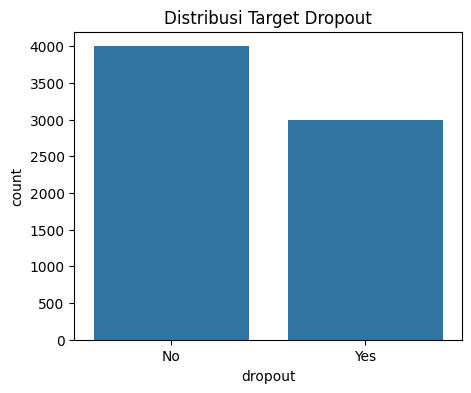

,proportion
dropout,
No,0.571429
Yes,0.428571


In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x="dropout", data=df)
plt.title("Distribusi Target Dropout")
plt.show()

df["dropout"].value_counts(normalize=True)

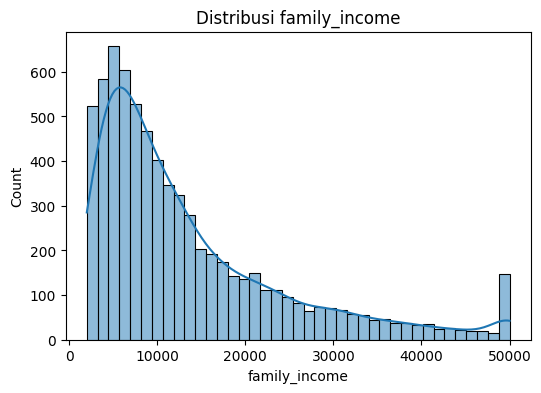

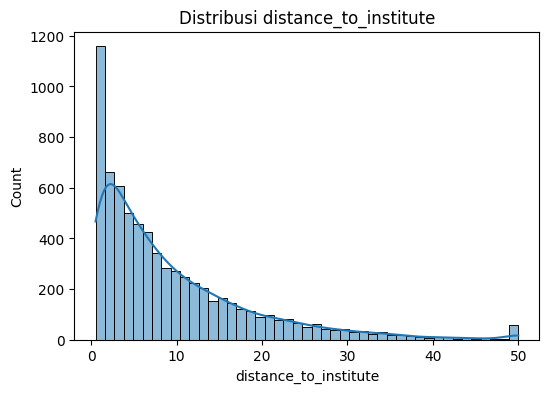

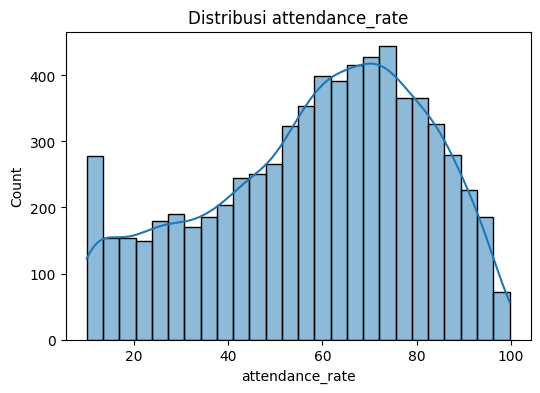

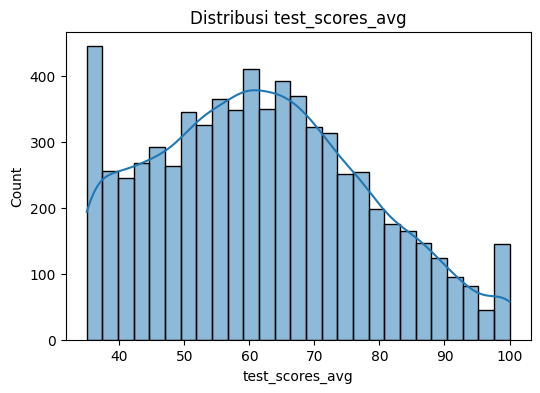

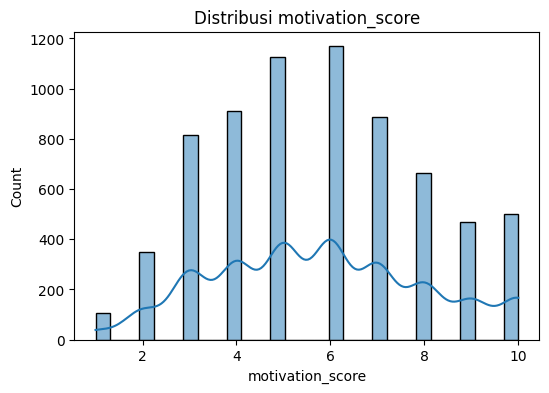

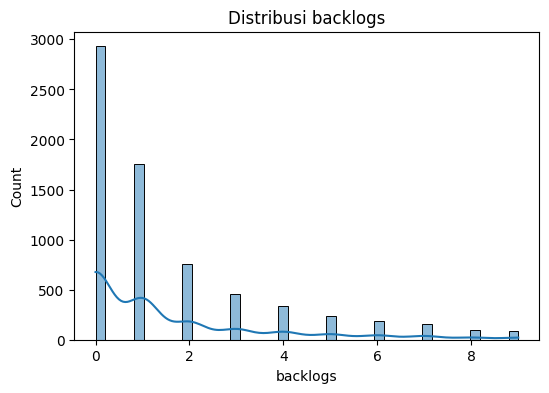

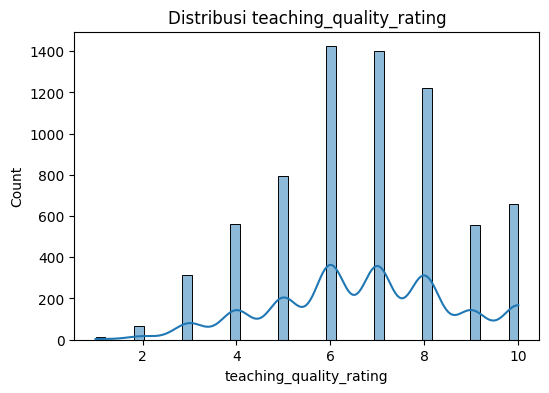

In [11]:
# EDA numerik
num_cols = [
    "family_income", "distance_to_institute",
    "attendance_rate", "test_scores_avg",
    "motivation_score", "backlogs",
    "teaching_quality_rating"
]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_tc[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

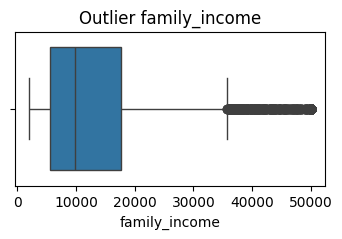

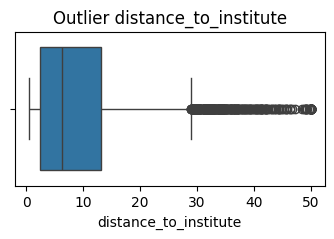

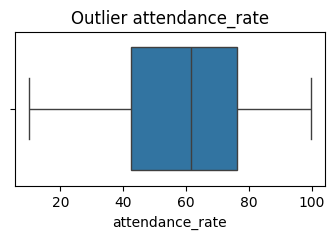

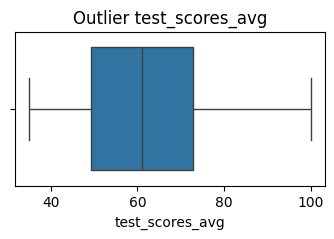

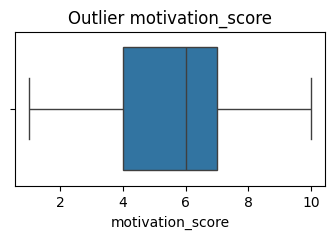

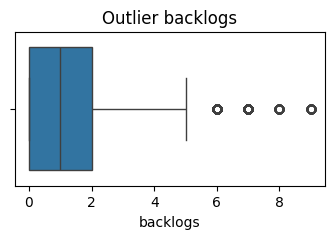

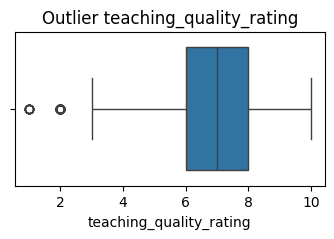

In [12]:
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df_tc[col])
    plt.title(f"Outlier {col}")
    plt.show()

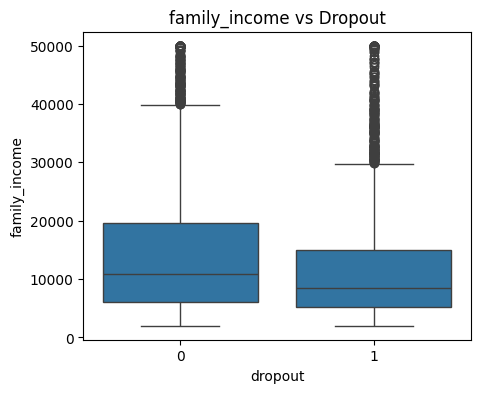

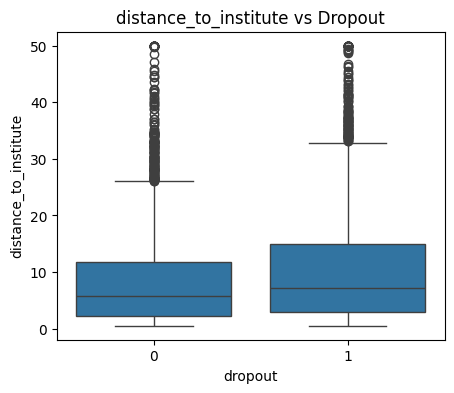

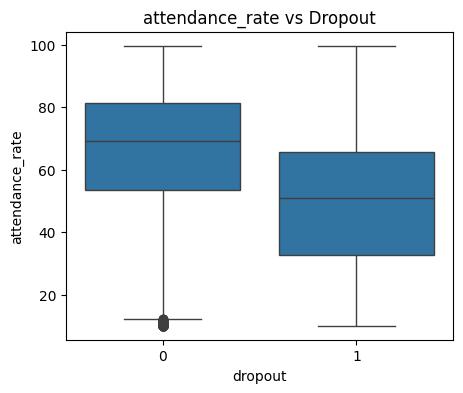

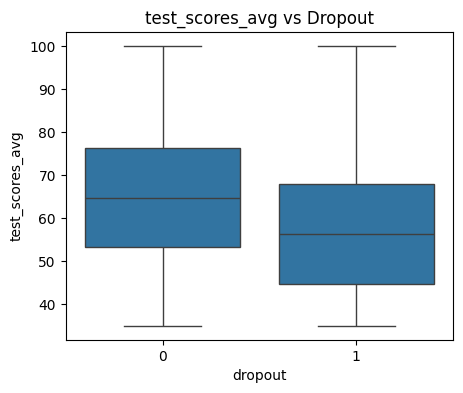

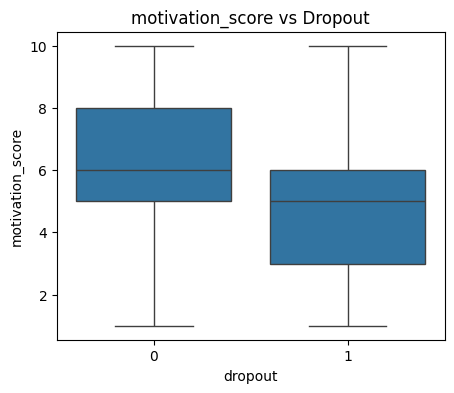

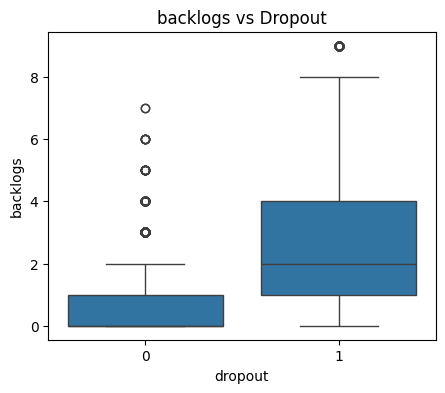

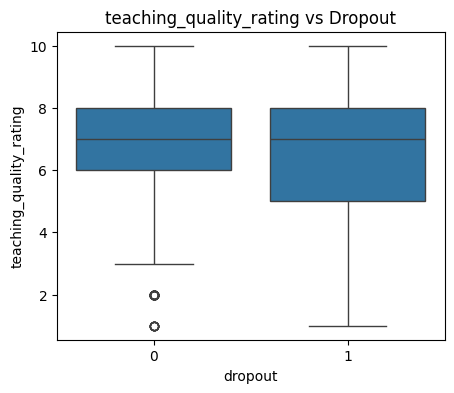

In [13]:
# EDA numerik vs dropout
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x="dropout", y=col, data=df_tc)
    plt.title(f"{col} vs Dropout")
    plt.show()

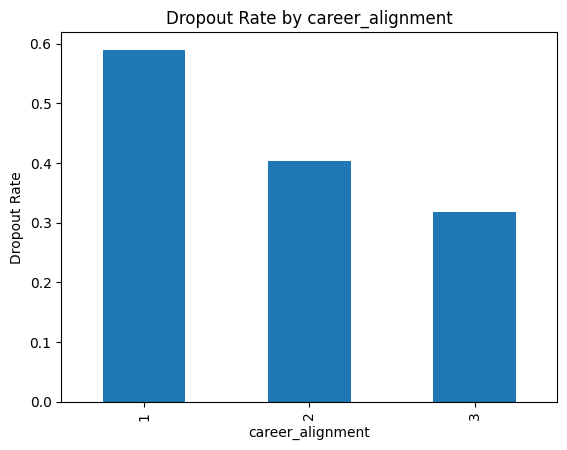

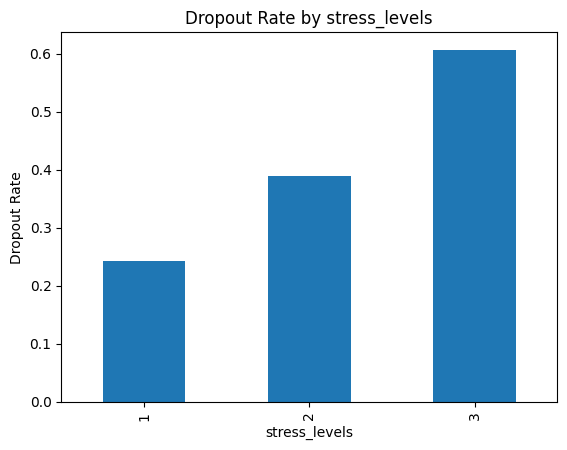

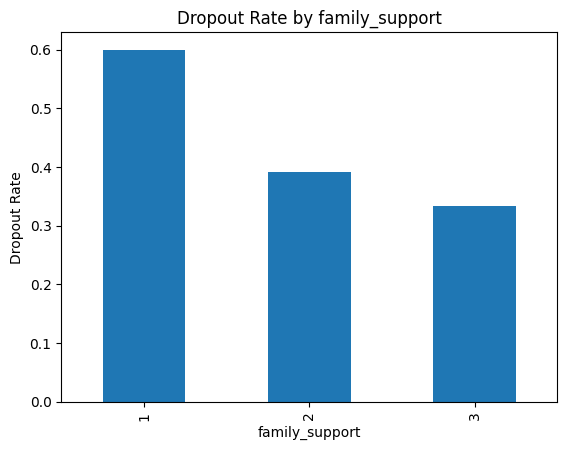

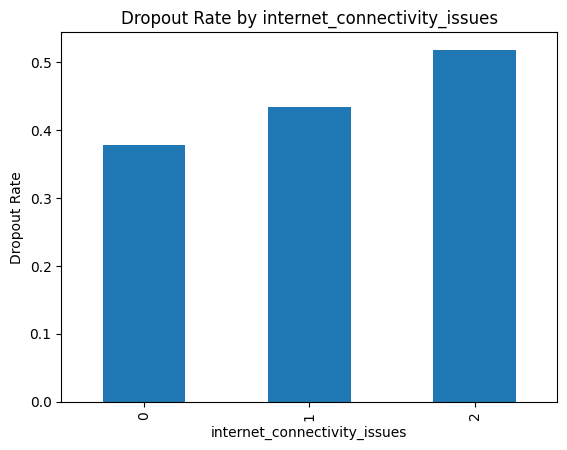

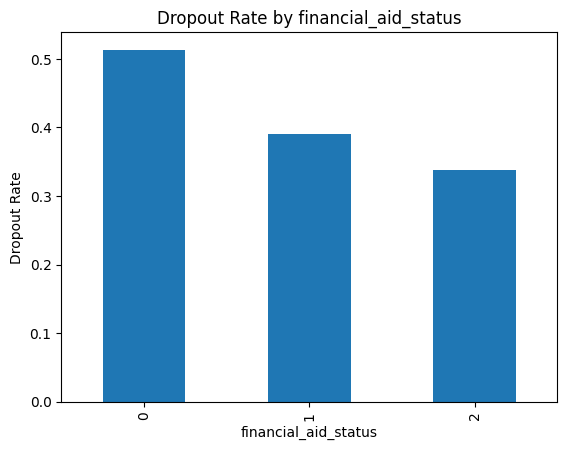

In [14]:
# EDA ordinal vs dropout
ordinal_cols = [
    "career_alignment",
    "stress_levels",
    "family_support",
    "internet_connectivity_issues",
    "financial_aid_status"
]

for col in ordinal_cols:
    rate = df_tc.groupby(col)["dropout"].mean()
    rate.plot(kind="bar", title=f"Dropout Rate by {col}")
    plt.ylabel("Dropout Rate")
    plt.show()

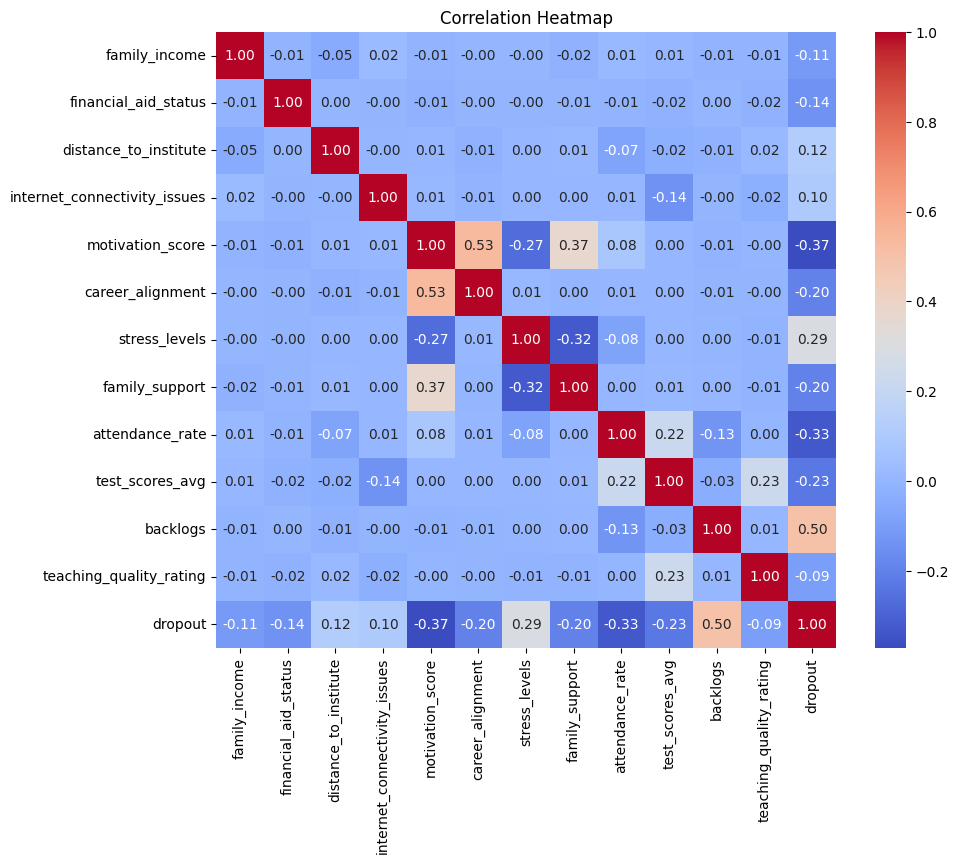

In [15]:
# korelasi
plt.figure(figsize=(10,8))
sns.heatmap(df_tc.drop(columns=["location_type"]).corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# EDA backlogs
bins = [-1, 0, 2, 5, df_tc["backlogs"].max()]
labels = ["No backlog", "Low", "Medium", "High"]

df_tc["backlog_group"] = pd.cut(df_tc["backlogs"], bins=bins, labels=labels)

print(df_tc.groupby("backlog_group")["dropout"].mean())

backlog_group
No backlog    0.205119
Low           0.423904
Medium        0.788499
High          0.985019
Name: dropout, dtype: float64


/tmp/ipython-input-2435452945.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_tc.groupby("backlog_group")["dropout"].mean())


In [17]:
# uji hipotesis
drop = df_tc[df_tc["dropout"]==1]["attendance_rate"]
stay = df_tc[df_tc["dropout"]==0]["attendance_rate"]

ttest_ind(drop, stay)

TtestResult(statistic=np.float64(-29.339896071098543), pvalue=np.float64(1.4648350213384893e-178), df=np.float64(6998.0))

# 4. Preprocessing

In [18]:
X = df_tc.drop(columns=["dropout", "backlog_group"])
y = df_tc["dropout"]

X["family_income_log"] = np.log1p(X["family_income"])
X["distance_to_institute_log"] = np.log1p(X["distance_to_institute"])

X = X.drop(columns=["family_income", "distance_to_institute"])

X = pd.get_dummies(X, columns=["location_type"], drop_first=True)

print("Feature setelah encoding:")
print(X.columns)

Feature setelah encoding:
Index(['financial_aid_status', 'internet_connectivity_issues',
       'motivation_score', 'career_alignment', 'stress_levels',
       'family_support', 'attendance_rate', 'test_scores_avg', 'backlogs',
       'teaching_quality_rating', 'family_income_log',
       'distance_to_institute_log', 'location_type_Semi-urban',
       'location_type_Urban'],
      dtype='object')


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(5600, 14) (1400, 14)


In [20]:
scaler = StandardScaler()

num_cols_scale = X.select_dtypes(include=["int64", "float64"]).columns

X_train[num_cols_scale] = scaler.fit_transform(X_train[num_cols_scale])
X_test[num_cols_scale] = scaler.transform(X_test[num_cols_scale])

X_train.head(15)

,financial_aid_status,internet_connectivity_issues,motivation_score,career_alignment,stress_levels,family_support,attendance_rate,test_scores_avg,backlogs,teaching_quality_rating,family_income_log,distance_to_institute_log,location_type_Semi-urban,location_type_Urban
6304,1.606894,0.265982,1.877035,0.001762,-1.413938,1.292673,-1.015013,1.516542,1.180858,1.199836,0.737816,-0.434472,False,True
4591,0.262213,1.603058,0.109746,0.001762,-0.124773,-0.045894,1.608587,1.620566,-0.747073,0.677560,1.068733,-0.182329,False,False
6231,1.606894,1.603058,0.993390,0.001762,1.164392,-0.045894,0.110008,-0.153961,0.698875,0.677560,-0.432185,0.354576,True,False
5990,0.262213,-1.071093,-0.332077,-1.408180,-0.124773,-0.045894,-1.349479,0.402873,0.216892,-0.889268,0.421991,0.793034,False,False
2919,0.262213,0.265982,-0.332077,0.001762,-0.124773,-0.045894,-1.597070,1.314613,-0.747073,0.155284,-0.828333,1.462582,False,False
2977,0.262213,-1.071093,-0.332077,-1.408180,-0.124773,-0.045894,1.230685,0.617041,-0.747073,-0.366992,-0.317990,-1.473916,False,True
6,0.262213,0.265982,0.551568,1.411704,-1.413938,-0.045894,0.470535,1.553257,-0.747073,1.722111,0.284216,0.342953,False,False
791,1.606894,0.265982,-1.657544,-1.408180,-0.124773,-0.045894,-0.233145,-0.802581,-0.265090,-0.366992,1.017883,-0.696491,False,True
6353,0.262213,-1.071093,0.993390,1.411704,-0.124773,-0.045894,-0.819546,-0.833177,-0.265090,-0.366992,-1.345625,1.804029,False,False
3836,-1.082468,-1.071093,1.435213,0.001762,-0.124773,-0.045894,-1.905474,0.170349,-0.265090,1.199836,0.304266,-1.666661,True,False


# 5. Export Data

In [21]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# 6. Baseline Model

In [22]:
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

In [23]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [24]:
# Prediksi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [25]:
# Evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       800
           1       0.84      0.92      0.87       600

    accuracy                           0.89      1400
   macro avg       0.88      0.89      0.89      1400
weighted avg       0.89      0.89      0.89      1400

Confusion Matrix:
[[692 108]
 [ 50 550]]
ROC-AUC Score:
0.9673458333333333
